# Algerian forest fires Data Analysis and Logistic Regression model building

## Life cycle of Machine Learning Project

* Understanding of the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory Data Alaysis
* Data pre-processing
* Model Building
* Model Evalution and validation
* Choosing Best Model

## Problem Statement

* The Dataset comprises of data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
* The User has to predict on perticular day is there chance getting froest fire or not based on given features
* The Predictions helps in future to tickle Forest fire situations and to make prevention of causing forest fire in future

## Data Collection

* Data Collected from UCI Repository : https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

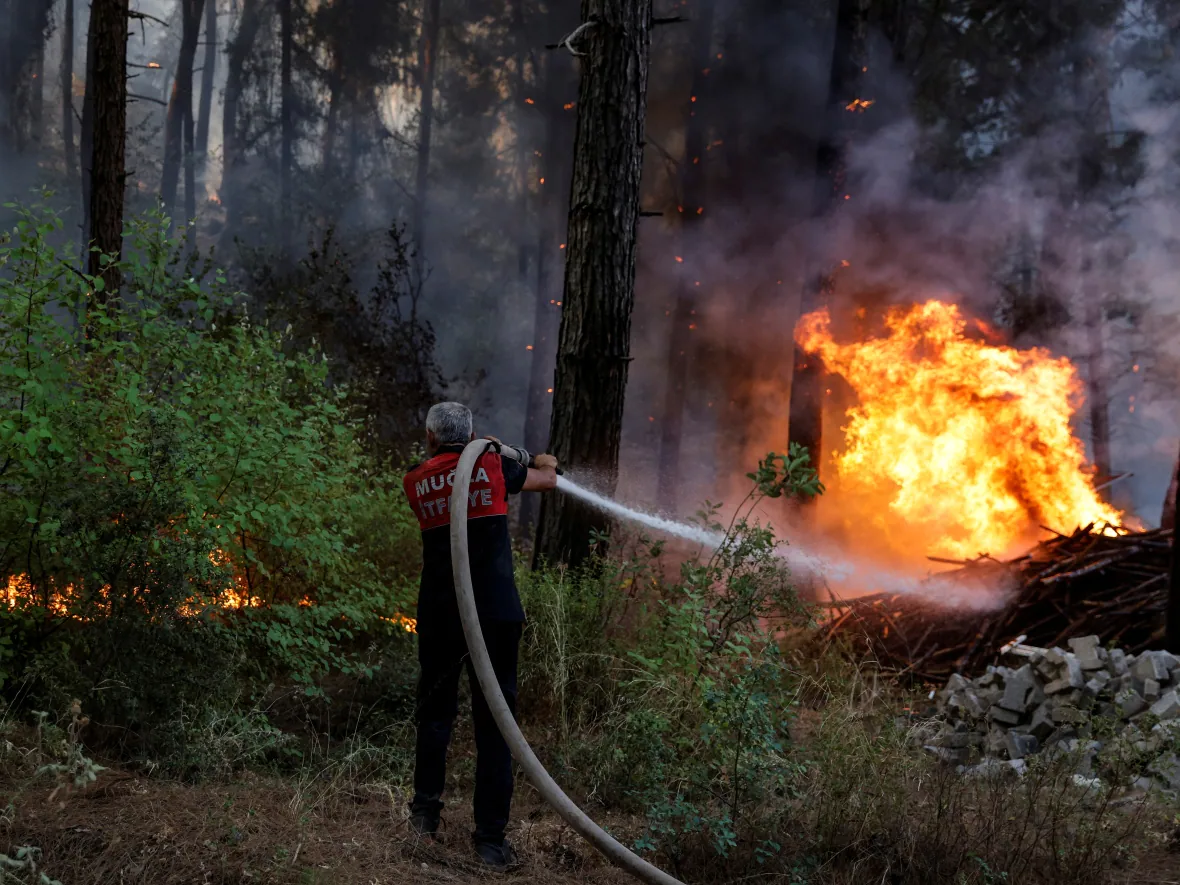

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Reading csv Data

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### checking columns in the dataset

In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

* Observation : few feature names are having spaces at the begining and end. Will strip the feature names

#### Striping the names of the column

In [4]:
df.columns = [i.strip() for i in df.columns]

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### shape of the dataset

In [6]:
df.shape

(246, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Checking null values in the dataset

In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

### Removing null vlaues

In [9]:
df[df['month'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [11]:
df.drop(axis=0, index=[122,123],inplace=True)

In [12]:
df.shape

(244, 14)

There are Two Regions in the Dataset 
1. Bejaria 
2. Sidi-Bel Abbes
### Adding additional column : Region

In [13]:
df['Region'] = None

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,None
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,None
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,None
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,None
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,None


In [15]:
#'Bejaia Region'
df.iloc[:122,-1] = "Bejaia"

In [16]:
df.iloc[122:,-1] = "Sidi-Bel Abbes"

In [17]:
df['Region'].value_counts()

Bejaia            122
Sidi-Bel Abbes    122
Name: Region, dtype: int64

### Data type checking

In [18]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [19]:
for feature in df.columns:
    print(df[feature].value_counts().sort_index())
    print('---------------------------')

01    8
02    8
03    8
04    8
05    8
06    8
07    8
08    8
09    8
10    8
11    8
12    8
13    8
14    8
15    8
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    8
24    8
25    8
26    8
27    8
28    8
29    8
30    8
31    4
Name: day, dtype: int64
---------------------------
06    60
07    62
08    62
09    60
Name: month, dtype: int64
---------------------------
2012    244
Name: year, dtype: int64
---------------------------
22     2
24     3
25     6
26     5
27     8
28    15
29    18
30    22
31    25
32    21
33    23
34    24
35    29
36    21
37     9
38     3
39     6
40     3
42     1
Name: Temperature, dtype: int64
---------------------------
21    1
24    1
26    1
29    1
31    1
     ..
86    3
87    4
88    3
89    3
90    1
Name: RH, Length: 62, dtype: int64
---------------------------
10     3
11     7
12     7
13    30
14    43
15    40
16    27
17    28
18    26
19    15
20     2
21     8
22     2
26     1
29     1
6      1
8      1
9      2
N

In [20]:
categorical_features = ['Classes','Region','day', 'month', 'year',]

**From value_counts() we can tell below column should be in numerical so will convert to numerical features**

In [21]:
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [22]:
# df[numerical_features].apply(pd.to_numeric)  ---> Giving error at index : 165 because of dirty data in DC column 

**Above line giving error in the index 165. will check why we got error**

In [23]:
df.iloc[[165]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


Observation:
Here this perticular row, data is not correctly arranged. Depandant Feature also mentioned as NaN.
Here we can do 2 options, manually correct the file or drop this particular column

In [24]:
df.drop(axis=0, index=[167],inplace=True)

**shape of the dataset**

In [25]:
df.shape

(243, 15)

In [26]:
numerical_variables = ['day', 'month', 'year','Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']
df[numerical_variables] = df[numerical_variables].apply(pd.to_numeric)

In [27]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

## Checking Null values

In [28]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

**Observation: Removed all Null vlaues from the dataset**

#### striping the Classess Feature

In [29]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [30]:
df['Classes'].value_counts().index

Index(['fire   ', 'not fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '],
      dtype='object')

In [31]:
df['Classes'] = df['Classes'].str.strip()

In [32]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

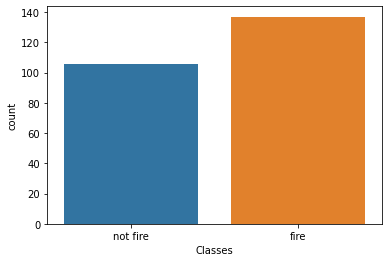

In [33]:
sns.countplot(x = df['Classes'])

# Univariate Analysis of Categorical Features

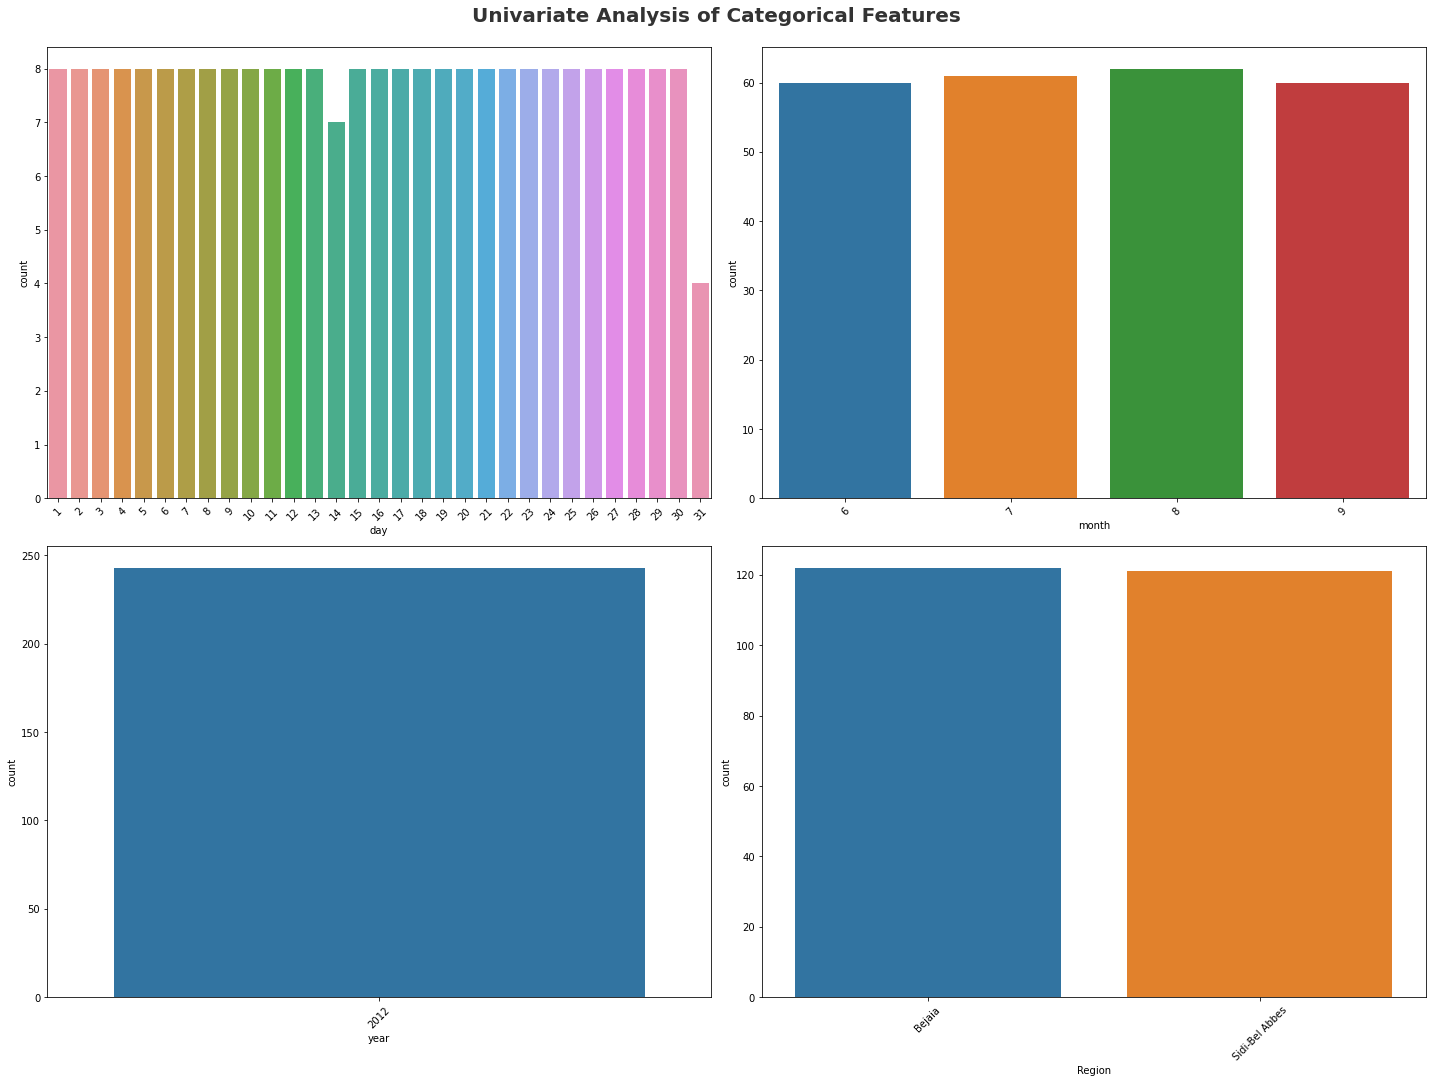

In [36]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['day', 'month', 'year', 'Region']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Univariate Analysis of Numerical Features

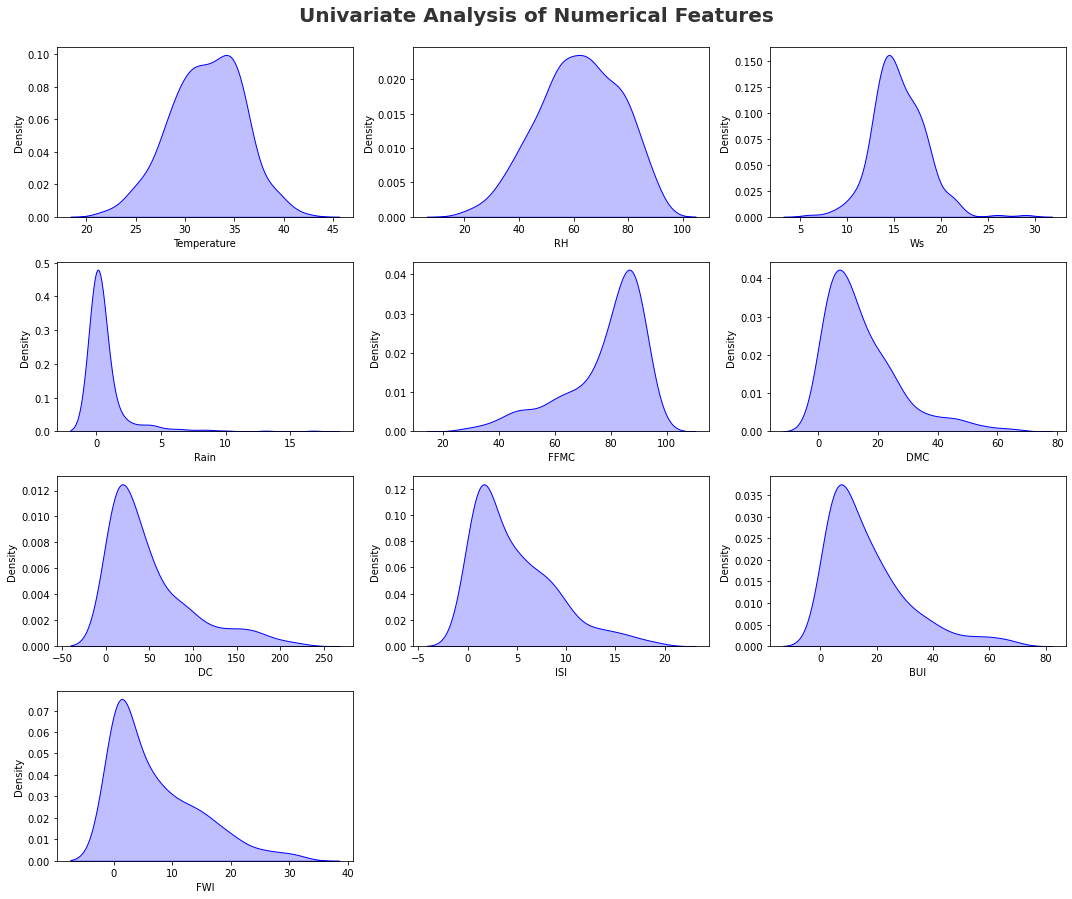

In [291]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

* **RIGHT SKEWED :** RAIN, DMC, DC, ISI, BUI, FWI
* **LEFT SKEWED :** FFMC
* **Outliers :** RAIN, FFMC, DMC, DC, ISI, BUI, FWI

### Here most of the features are Numerical so will plot Box plot

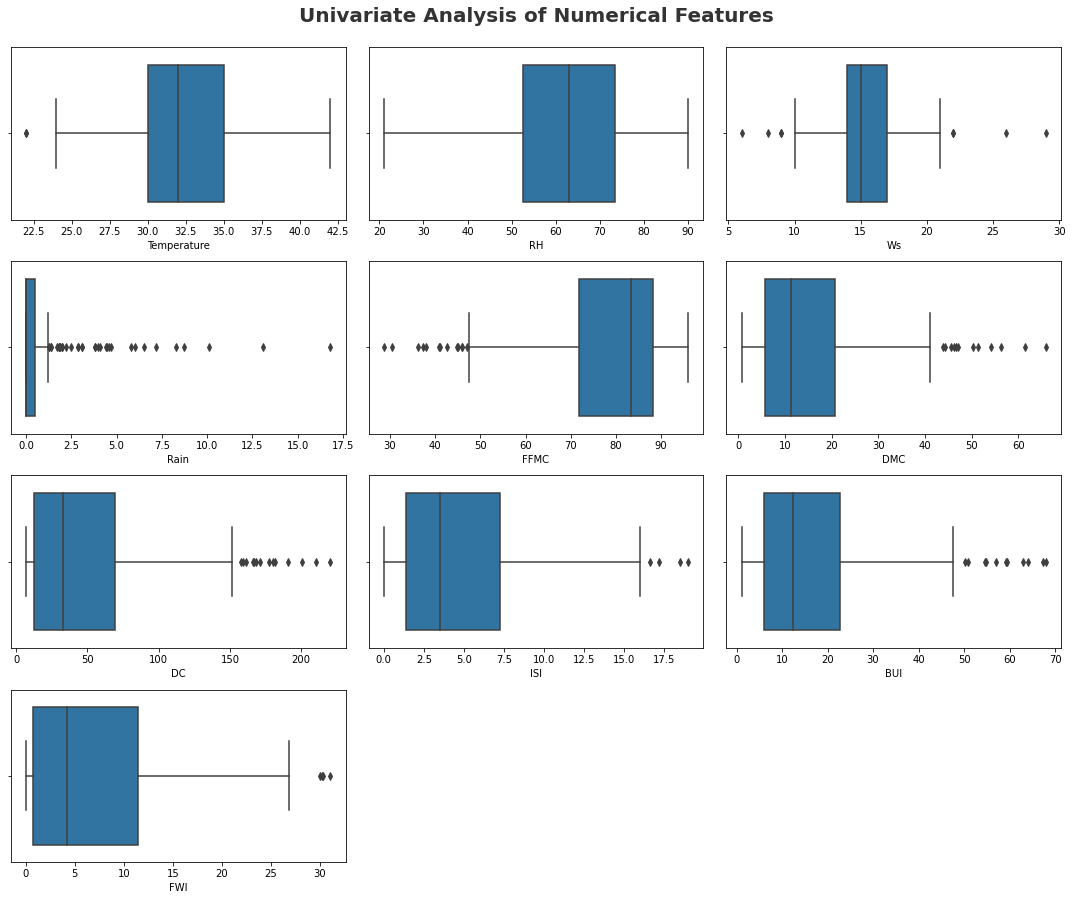

In [37]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [38]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Bivariate analysis 

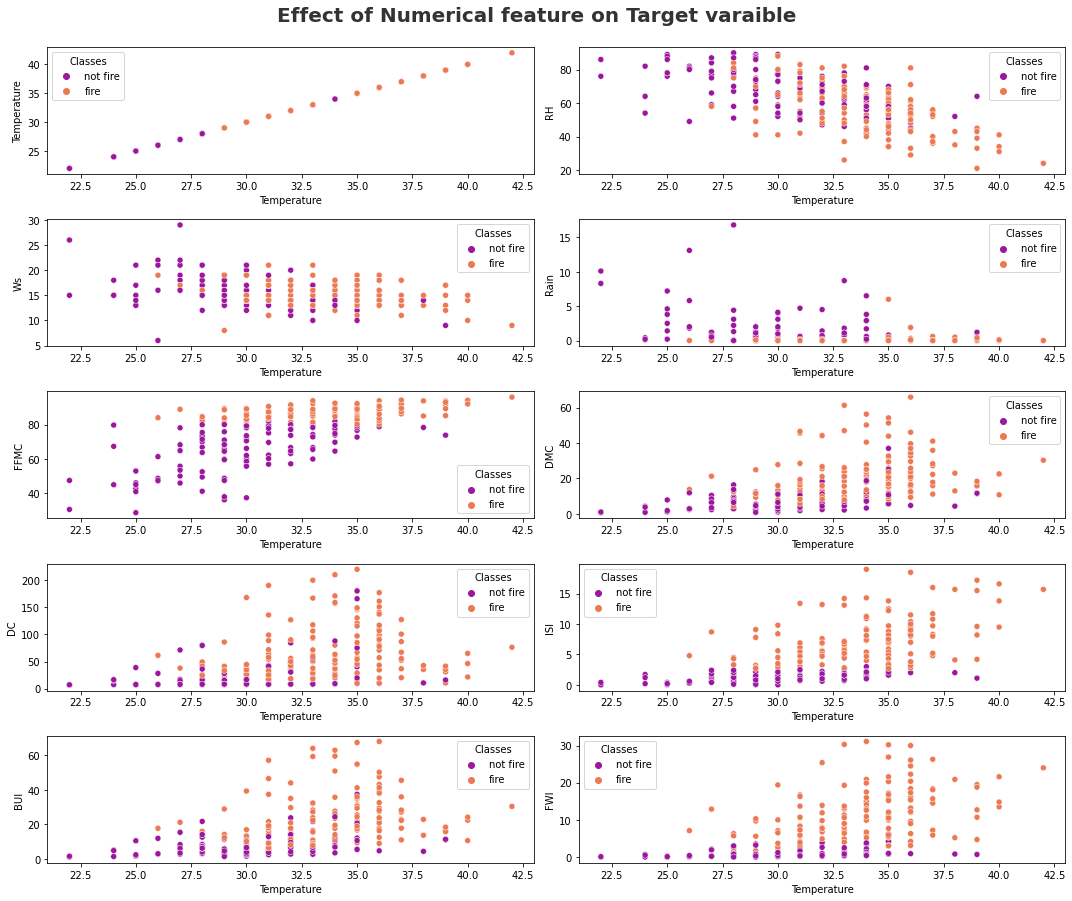

In [72]:
plt.figure(figsize=(15,24))
plt.suptitle("Effect of Numerical feature on Target varaible",fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numerical_features)):
    plt.subplot(10,2,i+1)
    sns.scatterplot(x =df['Temperature'], y =df[numerical_features[i]].sort_values(),hue=df['Classes'], palette ='plasma')
    plt.tight_layout()

* Observation:
    * In ['Temperature', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
        * When above columns are increasing chances of getting fired increasing (+ve Correlated)
    * In ['RH', 'Ws','Rain']
        * When above columns are increasing chances of getting fired decreasing (-ve Correlated)

# Multivariant Alalysis

### Check Multicollinearity in Numerical features

In [182]:
df[(list(df.columns))].corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521


<AxesSubplot:>

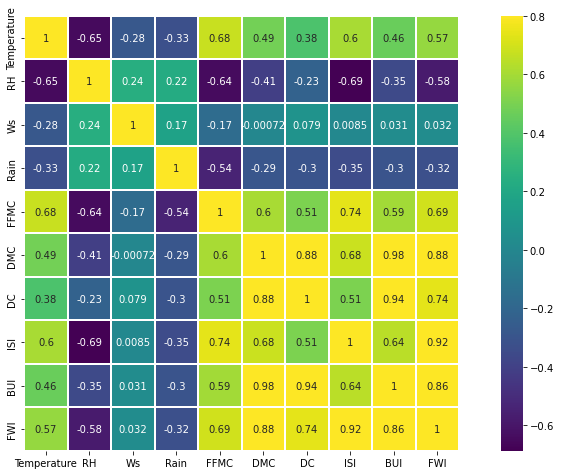

In [183]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df[numerical_features].corr(),vmax=0.8,linewidths=0.01,square=True, annot=True,cmap='viridis',
           linecolor='white')

**Observation**
* Below features are highly correlated(Positive corre) (consider >65%):
    1. DC with DMC, BUI
    2. BUI with DMC, DC, FWI
    3. FWI with DMC, DC, ISI, BUI
    

<AxesSubplot:xlabel='month', ylabel='Temperature'>

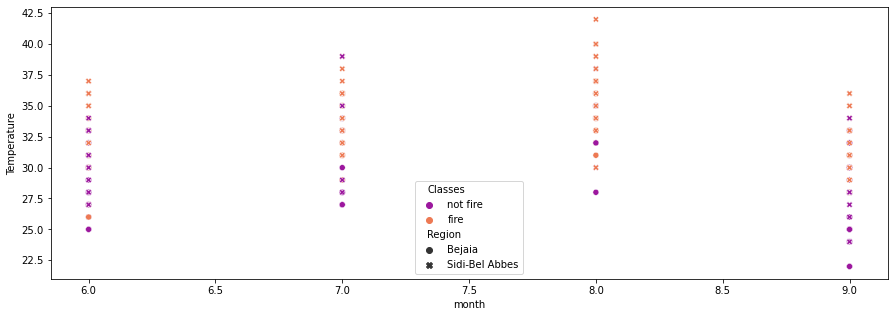

In [187]:
plt.figure(figsize=(15,5))
sns.scatterplot(x =df['month'], y=df['Temperature'].sort_values(),hue=df['Classes'],style=df['Region'], palette ='plasma')

* Observation : 
    * Lowest temperature registered on 9th month
    * Sidi-Bel Abbes Region getting fired is very
    * Temparature is very high on Sidi-Bel bbes
    * Bejaia Region registering low Temperatures compare to Sidi-Bel Abbes
    * Threshold value is 30 degrees, above 30 degrees chances of getting fire is very high

In [308]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [475]:
df.skew()

day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           2.746735
FFMC          -0.974453
DMC            1.007613
DC             1.223541
ISI            0.455363
BUI            0.988147
FWI            1.147593
Classes       -0.258846
Region         0.008282
dtype: float64

In [73]:
def classes(a):
    if a == 'fire':
        return 1
    elif a =='not fire':
        return 0
    
df['Classes'] = df['Classes'].apply(classes)

In [74]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [75]:
df['Region'].value_counts()

Bejaia            122
Sidi-Bel Abbes    121
Name: Region, dtype: int64

In [76]:
df['Region'] = df['Region'].map({'Bejaia':'0', 'Sidi-Bel Abbes':'1'})

In [77]:
df['Region'].value_counts()

0    122
1    121
Name: Region, dtype: int64

In [78]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [79]:
df_final = df.copy(deep=True)

In [80]:
df_final.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Independent and Dependent Features

In [81]:
X = df_final.drop('Classes',axis=1)
y = df_final['Classes']

In [82]:
X.shape, y.shape

((243, 14), (243,))

### Train and Test spliting of Data

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [138]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 14), (73, 14), (170,), (73,))

### Standarding Data

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [140]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [143]:
log_reg.coef_

array([[-0.22843452, -0.04883197,  0.        ,  0.05268918,  0.16938228,
        -0.1003674 ,  0.26424901,  2.44398653,  0.0536943 ,  0.40747378,
         2.18893251,  0.18115052,  1.71796925,  0.13253248]])

In [144]:
log_reg.intercept_

array([1.37830633])

In [145]:
log_pred = log_reg.predict(X_test)
log_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [146]:
print('score : ',log_reg.score(X_test,y_test))

score :  0.958904109589041


In [147]:
from sklearn.metrics import log_loss
log_loss_cf = log_loss(y_test,log_pred)
log_loss_cf

1.4194236764327741

## Model Evalution

In [148]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [152]:
print('accuracy :',accuracy_score(y_test,log_pred))

accuracy : 0.958904109589041


In [172]:
conf_mat = pd.DataFrame(confusion_matrix(y_test,log_pred),index = ['not fire','fire'],columns=['not fire','fire'])
conf_mat

,not fire,fire
not fire,27,2
fire,1,43


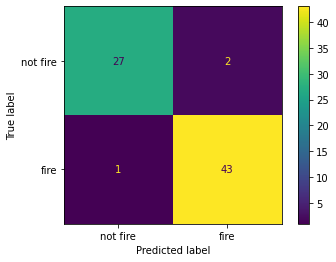

In [159]:
plot_confusion_matrix(log_reg,X_test,y_test,display_labels=['not fire','fire'])

In [173]:
true_positive = conf_mat['not fire']['fire']
false_positive = conf_mat['fire']['not fire']
false_negative = conf_mat['not fire']['fire']
true_negative = conf_mat['fire']['fire']

In [174]:
precision = true_positive/(true_positive+flase_positive)
precision

0.03333333333333333

In [175]:
recall = true_positive/(true_positive+false_negative)
recall

0.5

In [176]:
f1_score = 2*((precision * recall)/(precision+recall))
f1_score

0.0625

In [177]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, log_pred)

(array([0.96428571, 0.95555556]),
 array([0.93103448, 0.97727273]),
 array([0.94736842, 0.96629213]),
 array([29, 44], dtype=int64))

In [178]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('-------- Positive not fire ---------------')
print('precision score :',precision_score(y_test,log_pred,pos_label=0))
print('recall score:',recall_score(y_test,log_pred,pos_label=0))
print('f1_score:',f1_score(y_test,log_pred,pos_label=0))
print('-------- Positive fire ---------------')
print('precision score :',precision_score(y_test,log_pred,pos_label=1))
print('recall score:',recall_score(y_test,log_pred,pos_label=1))
print('f1_score:',f1_score(y_test,log_pred,pos_label=1))

-------- Positive not fire ---------------
precision score : 0.9642857142857143
recall score: 0.9310344827586207
f1_score: 0.9473684210526316
-------- Positive fire ---------------
precision score : 0.9555555555555556
recall score: 0.9772727272727273
f1_score: 0.9662921348314608
